# Object detection with YOLOv3

[Object detection](https://en.wikipedia.org/wiki/Object_detection) is the process by which computers find and identify objects in images. Identifying an object is an image-classification problem, something at which CNNs excel. But finding objects to identify in the first place is an altogether different challenge.

Object detection is important because objects might not be perfectly cropped and aligned as they are in training images. In addition, a scene might contain two or more objects, in which case each needs to be located before it can be classified. Self-driving cars analyze video frames to identify objects such as bikes and pedestrians. A CNN trained to do conventional image classification using carefully prepared training images won’t do a lot of good in that context.

Object detection has grown in speed and accuracy in recent years, and state-of-the-art methods rely on deep learning — in particular, on CNNs. One of the fastest object-detection systems is [YOLO](https://pjreddie.com/darknet/yolo/), which is short for "You Only Look Once." YOLO applies a single CNN to an image, and the image passes through the network only once. Moreover, Keras implementations of YOLO are available in the public domain, as are the weights arrived at by training it on the [COCO dataset](https://cocodataset.org/#home).

Let’s try our hand at using YOLO to do object detection. The first step is to [download the H5 file](https://1drv.ms/u/s!Av8u_NJzP1I4kJV3lp975YecSrJpHQ?e=osX2Oa) containing the trained and serialized model. Name it **coco_yolo3.h5** and save it in the directory where this notebook is hosted. The model encapsulated in the H5 file is an instance of YOLOv3 (YOLO version 3) trained on the COCO dataset with images measuring 416 x 416 pixels. It is sometimes referred to as YOLOv3-416, and it has been clocked at 35 FPS analyzing images on systems equipped with GPUs — plenty fast enough if your goal is to build a self-driving car.

The next step is to import a Python file containing helper classes and helper functions and use Keras's [load_model](https://keras.io/api/models/model_saving_apis/#loadmodel-function) function to load the model. The file is named **yolo3.py** and it's stored in the same directory as this notebook. It is a modified version of a [larger file](https://github.com/experiencor/keras-yolo3/blob/master/yolo3_one_file_to_detect_them_all.py) that's available in the [keras-yolo3](https://github.com/experiencor/keras-yolo3) project on GitHub. I removed elements that weren't needed and rewrote some of the code for improved utility and performance, but most of the credit goes to Huynh Ngoc Anh, whose GitHub ID is [experiencor](https://github.com/experiencor).

In [1]:
from yolo3 import *
from keras.models import load_model

model = load_model('Data/coco_yolo3.h5')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv_0 (Conv2D)                (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 bnorm_0 (BatchNormalization)   (None, None, None,   128         ['conv_0[0][0]']                 
                                32)                                                         

                                64)                                                               
                                                                                                  
 bnorm_9 (BatchNormalization)   (None, None, None,   256         ['conv_9[0][0]']                 
                                64)                                                               
                                                                                                  
 leaky_9 (LeakyReLU)            (None, None, None,   0           ['bnorm_9[0][0]']                
                                64)                                                               
                                                                                                  
 conv_10 (Conv2D)               (None, None, None,   73728       ['leaky_9[0][0]']                
                                128)                                                              
          

 conv_20 (Conv2D)               (None, None, None,   294912      ['leaky_19[0][0]']               
                                256)                                                              
                                                                                                  
 bnorm_20 (BatchNormalization)  (None, None, None,   1024        ['conv_20[0][0]']                
                                256)                                                              
                                                                                                  
 leaky_20 (LeakyReLU)           (None, None, None,   0           ['bnorm_20[0][0]']               
                                256)                                                              
                                                                                                  
 add_51 (Add)                   (None, None, None,   0           ['add_50[0][0]',                 
          

                                                                                                  
 conv_32 (Conv2D)               (None, None, None,   294912      ['leaky_31[0][0]']               
                                256)                                                              
                                                                                                  
 bnorm_32 (BatchNormalization)  (None, None, None,   1024        ['conv_32[0][0]']                
                                256)                                                              
                                                                                                  
 leaky_32 (LeakyReLU)           (None, None, None,   0           ['bnorm_32[0][0]']               
                                256)                                                              
                                                                                                  
 add_55 (A

                                512)                                                              
                                                                                                  
 add_58 (Add)                   (None, None, None,   0           ['add_57[0][0]',                 
                                512)                              'leaky_42[0][0]']               
                                                                                                  
 conv_44 (Conv2D)               (None, None, None,   131072      ['add_58[0][0]']                 
                                256)                                                              
                                                                                                  
 bnorm_44 (BatchNormalization)  (None, None, None,   1024        ['conv_44[0][0]']                
                                256)                                                              
          

 leaky_54 (LeakyReLU)           (None, None, None,   0           ['bnorm_54[0][0]']               
                                512)                                                              
                                                                                                  
 add_62 (Add)                   (None, None, None,   0           ['add_61[0][0]',                 
                                512)                              'leaky_54[0][0]']               
                                                                                                  
 conv_56 (Conv2D)               (None, None, None,   131072      ['add_62[0][0]']                 
                                256)                                                              
                                                                                                  
 bnorm_56 (BatchNormalization)  (None, None, None,   1024        ['conv_56[0][0]']                
          

                                                                                                  
 bnorm_66 (BatchNormalization)  (None, None, None,   2048        ['conv_66[0][0]']                
                                512)                                                              
                                                                                                  
 leaky_66 (LeakyReLU)           (None, None, None,   0           ['bnorm_66[0][0]']               
                                512)                                                              
                                                                                                  
 conv_67 (Conv2D)               (None, None, None,   4718592     ['leaky_66[0][0]']               
                                1024)                                                             
                                                                                                  
 bnorm_67 

                                512)                                                              
                                                                                                  
 leaky_77 (LeakyReLU)           (None, None, None,   0           ['bnorm_77[0][0]']               
                                512)                                                              
                                                                                                  
 conv_78 (Conv2D)               (None, None, None,   4718592     ['leaky_77[0][0]']               
                                1024)                                                             
                                                                                                  
 bnorm_78 (BatchNormalization)  (None, None, None,   4096        ['conv_78[0][0]']                
                                1024)                                                             
          

 conv_96 (Conv2D)               (None, None, None,   32768       ['leaky_91[0][0]']               
                                128)                                                              
                                                                                                  
 bnorm_96 (BatchNormalization)  (None, None, None,   512         ['conv_96[0][0]']                
                                128)                                                              
                                                                                                  
 leaky_96 (LeakyReLU)           (None, None, None,   0           ['bnorm_96[0][0]']               
                                128)                                                              
                                                                                                  
 up_sampling2d_5 (UpSampling2D)  (None, None, None,   0          ['leaky_96[0][0]']               
          

                                                                                                  
 leaky_104 (LeakyReLU)          (None, None, None,   0           ['bnorm_104[0][0]']              
                                256)                                                              
                                                                                                  
 conv_81 (Conv2D)               (None, None, None,   261375      ['leaky_80[0][0]']               
                                255)                                                              
                                                                                                  
 conv_93 (Conv2D)               (None, None, None,   130815      ['leaky_92[0][0]']               
                                255)                                                              
                                                                                                  
 conv_105 

Load an image from the file system, save its width and height (we'll need those in a minute), and display the image.

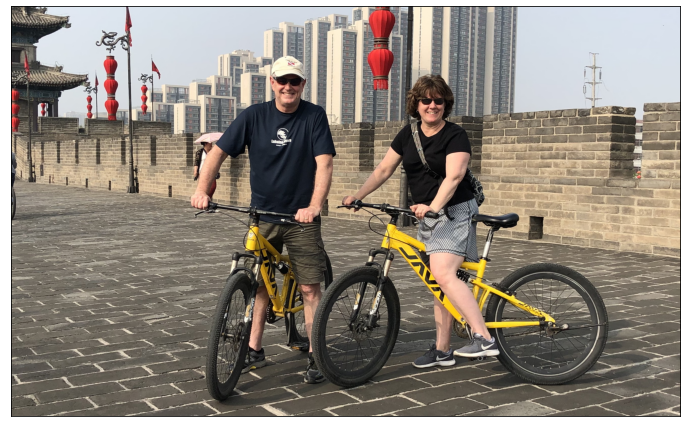

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

image = plt.imread('Data/xian.jpg')
width, height = image.shape[1], image.shape[0]
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

Now load the image, resize it to 416 x 416 (the size that YOLOv3-416 expects), preprocess the pixel values by dividing them by 255, and pass the resulting image to the model for prediction. The variables `YOLO3.width` and `YOLO3.height` come from **yolo3.py**. Each is equal to 416.

In [3]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

x = load_img('Data/xian.jpg', target_size=(YOLO3.width, YOLO3.height))
x = img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)

`predict` returns a list of three NumPy arrays containing information, including bounding boxes, about objects detected in the image, but the arrays need to be decoded in order to make sense of the output. Among other things, a technique called [non-maximum suppression](https://learnopencv.com/non-maximum-suppression-theory-and-implementation-in-pytorch/) (NMS) must be applied to filter the bounding boxes. To make things simple, I wrote a function called `decode_predictions` (inspired by Keras's [decode_predictions](https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions) function) to do all the necessary post-processing. `decode_predictions` requires the width and height of the original image as input so it can scale the bounding boxes to match the original image dimensions. The return value is a list of `BoundingBox` objects, each containing the pixel coordinates of a box surrounding an object detected in the scene, along with a label identifying the object and a confidence value from 0.0 to 1.0. To demonstrate, pass the predictions returned by `predict` to `decode_predictions` and list the bounding boxes.

In [4]:
boxes = decode_predictions(y, width, height)

for box in boxes:
    print(f'({box.xmin}, {box.ymin}), ({box.xmax}, {box.ymax}), {box.label}, {box.score}')

(692, 232), (1303, 1490), person, 0.9970048069953918
(1314, 327), (1920, 1496), person, 0.9957388639450073
(716, 786), (1277, 1634), bicycle, 0.9924144744873047
(1210, 845), (2397, 1600), bicycle, 0.9957170486450195


The model detected four objects in the image: two people and two bikes. The labels come from the COCO dataset. There are 80 in all, and they're built into the `YOLO3` class in **yolo3.py**. Use the following command to list them:

In [5]:
YOLO3.labels

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv monitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

**yolo3.py** also contains a helper function named `draw_boxes` that loads an image from the file system and draws the bounding boxes returned by `decode_predictions` as well as labels and confidence values. Use the following statement to visualize what the model found in the image above:

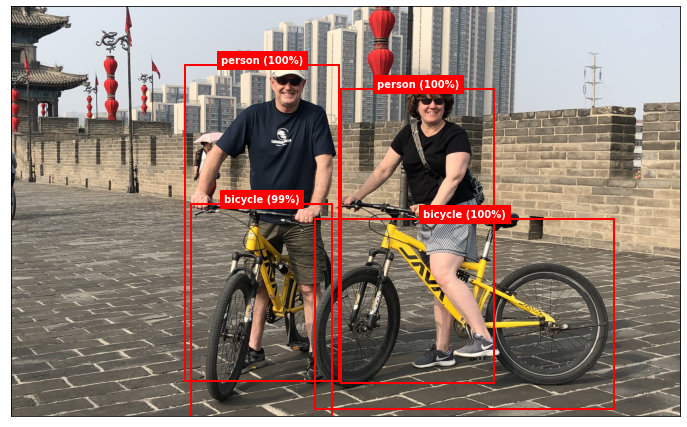

In [6]:
annotate_image('Data/xian.jpg', boxes)

Now let's try it with another image — this time, a photo of my youngest daughter and the family dog. First show the image.

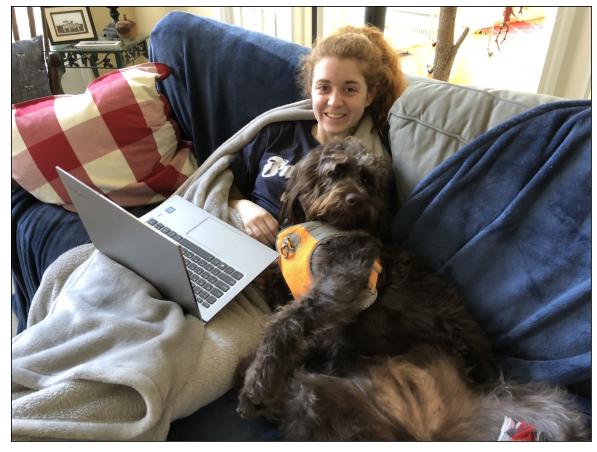

In [7]:
image = plt.imread('Data/abby-lady.jpg')
width, height = image.shape[1], image.shape[0]
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

Preprocess the image and pass it to the model's `predict` method.

In [8]:
x = load_img('Data/abby-lady.jpg', target_size=(YOLO3.width, YOLO3.height))
x = img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)

Show the image again, this time labeled with the objects detected in the image.

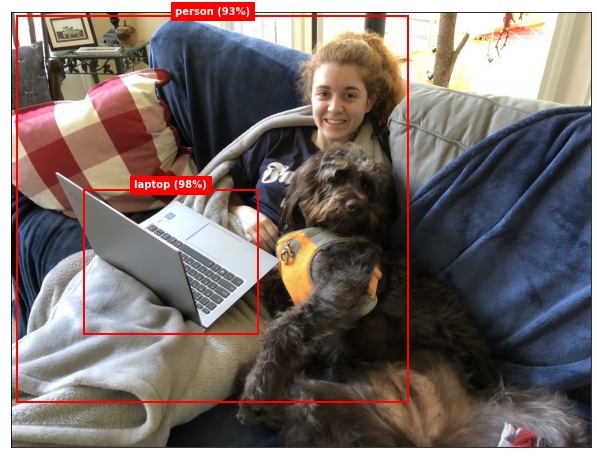

In [9]:
boxes = decode_predictions(y, width, height)
annotate_image('Data/abby-lady.jpg', boxes)

The model detected my daughter and her laptop, but it didn't detect the dog even though the training images included dogs.

Under the hood, it *did* detect the dog, but with less than 90% confidence. The model's `predict` method typically returns information about thousands of bounding boxes, most of which can be ignored because the confidence levels are so low. By default, `decode_predictions` ignores bounding boxes with confidence scores less than 0.9, but you can override that by including a `min_score` parameter in the call. Use the following statements to decode the predictions and visualize them again, this time with a minimum confidence level of 55%:

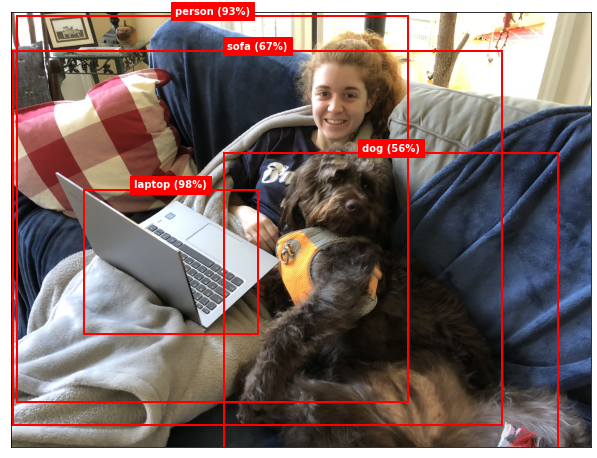

In [10]:
boxes = decode_predictions(y, width, height, min_score=0.55)
annotate_image('Data/abby-lady.jpg', boxes)

With the confidence threshold lowered to 0.55, the model not only detected the dog, but also the sofa. Because the model was trained on the COCO dataset, it can detect lots of other objects, too, including traffic lights, stop signs, various types of food and animals, and even bottles and wine glasses.